data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 설명 
- 시계열, 순차열 데이터와 RNN을 이용해 예측, 분류 하기 위한 기본 템플릿 


# 데이터 압축 풀기

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip

--2022-01-10 04:20:13--  https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip [following]
--2022-01-10 04:20:14--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1835488 (1.8M) [application/zip]
Saving to: ‘commodity.zip’

commodity.zip       100%[===================>]   1.75M  --.-KB/s    in 0.06s   

2022-01-10 04:20:14 (30.0 MB/s) - ‘commodity.zip’ saved [1835488/1835488]



In [ ]:
!rm -rf commodity
!unzip commodity.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파라매터 설정

In [ ]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [ ]:
df = pd.read_csv("commodity/Silver.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.950,4.950,4.895,4.930,4.930,2319.0
1,2000-08-31,4.920,5.045,4.920,5.003,5.003,1612.0
2,2000-09-01,5.035,5.035,4.985,5.004,5.004,1375.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,4.990,5.005,4.975,4.998,4.998,856.0


In [ ]:
print(len(df))

5291


# 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5181 non-null   float64
 2   High       5181 non-null   float64
 3   Low        5181 non-null   float64
 4   Close      5181 non-null   float64
 5   Adj Close  5181 non-null   float64
 6   Volume     5181 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


In [ ]:
df.isnull().sum()

Date           0
Open         110
High         110
Low          110
Close        110
Adj Close    110
Volume       110
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5181 non-null   object 
 1   Open       5181 non-null   float64
 2   High       5181 non-null   float64
 3   Low        5181 non-null   float64
 4   Close      5181 non-null   float64
 5   Adj Close  5181 non-null   float64
 6   Volume     5181 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.8+ KB


# 정렬 순서 확인

In [ ]:
df.sort_values(by=["Date"],inplace=True) #<---- 날짜 순서 대로 정렬, 날짜 순서 대로 패턴을 학습해야 하기 때문 

In [ ]:
sorted_index = df.sort_values(by=["Date"]).index

In [ ]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index)) #<--- df의 인덱스랑 정렬한 인덱스간 비교 해서 실제로 정렬 되어 있는지 확인 

Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290],
           dtype='int64', length=5181)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=5181)
0


In [ ]:
print(df['Close'] - df['Adj Close'])
print(sum(df['Close'] - df['Adj Close'])) #<---- 정렬 확인 

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
Length: 5181, dtype: float64
0.0


In [ ]:
df.drop(columns=["Date", "Adj Close"], inplace=True)

Open


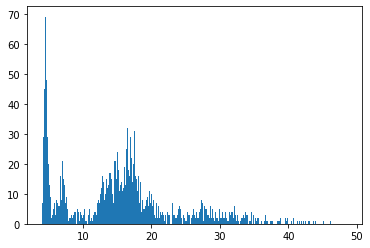

High


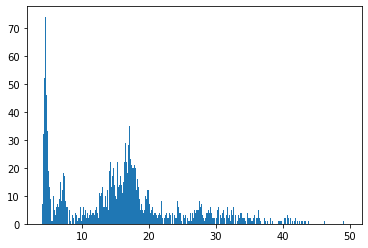

Low


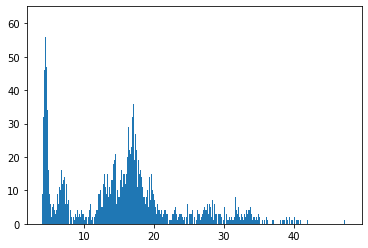

Close


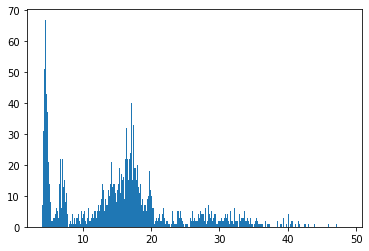

Volume


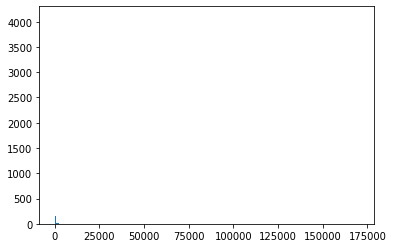

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

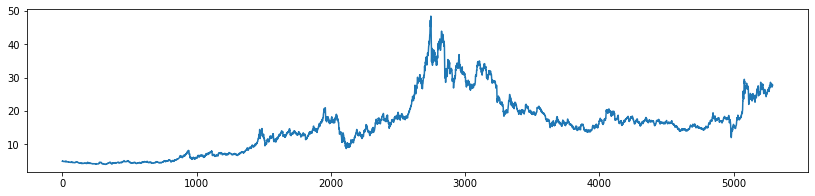

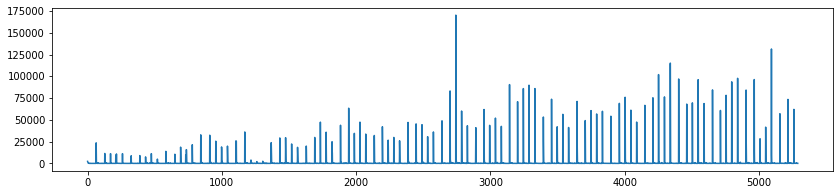

In [ ]:
#시계열 그래프 
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(5181, 5)


In [ ]:
print(raw_data[:5])

[[   4.95     4.95     4.895    4.93  2319.   ]
 [   4.92     5.045    4.92     5.003 1612.   ]
 [   5.035    5.035    4.985    5.004 1375.   ]
 [   4.99     5.005    4.975    4.998  856.   ]
 [   5.       5.       4.98     4.983  232.   ]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0) #<- 각 컬럼의 최대 값 
print(maxs)
mins = raw_data.min(axis=0) #<- 각 컬럼의 최소 값 
print(mins)

[4.8459999e+01 4.9520000e+01 4.7540001e+01 4.8584000e+01 1.7029700e+05]
[4.026 4.026 4.026 4.026 0.   ]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.02079489 0.02031037 0.01997058 0.02028816 0.01361739]
 [0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]]


In [ ]:
preprocessed = normalized

# by Data Sampling <--- 윈도우, 오프셋 나누기 

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.02079489 0.02031037 0.01997058 0.02028816 0.01361739]
 [0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]
 [0.02147005 0.0209698  0.02077492 0.02040038 0.00176163]
 [0.02056983 0.02020047 0.0203153  0.02013107 0.00070465]
 [0.01978215 0.01943113 0.01974077 0.01927824 0.00066355]
 [0.02045731 0.02009056 0.02008549 0.01981687 0.00123901]
 [0.02011973 0.01965094 0.01962587 0.01943534 0.00051087]]
[0.0195571  0.01943113 0.01962587 0.01934557 0.00060483]

[[0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]
 [0.02147005 0.0209698  0.02077492 0.02040038 0.00176163]
 [0.02056983 0.02020047 0.0203153  0.02013107 0.00070465]
 [0.01978215 

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(5170, 10, 5)
(5170, 5)
Training Data:
(4653, 10, 5)
(4653, 5)
Test Data:
(517, 10, 5)
(517, 5)


train_x[0]
 [[4.29265887e-01 4.23682266e-01 4.38341673e-01 4.32582275e-01
  2.93604702e-05]
 [4.18013243e-01 4.28056447e-01 4.26851119e-01 4.31190807e-01
  2.34883762e-05]
 [4.43781821e-01 4.33991296e-01 4.35009412e-01 4.24817092e-01
  1.29186069e-04]
 [4.29265887e-01 4.26627665e-01 4.38226745e-01 4.33008663e-01
  1.76162821e-04]
 [4.31516439e-01 4.21462193e-01 4.31217552e-01 4.21630235e-01
  1.76162821e-05]
 [4.26227673e-01 4.16846178e-01 4.32113793e-01 4.21989317e-01
  2.34883762e-05]
 [4.40518532e-01 4.43443113e-01 4.49832228e-01 4.51411621e-01
  4.11046583e-05]
 [4.51658627e-01 4.41244999e-01 4.53463220e-01 4.42838525e-01
  5.04600786e-01]
 [4.48845466e-01 4.51136392e-01 4.57301065e-01 4.51007675e-01
  1.15733102e-01]
 [4.60885796e-01 4.50257177e-01 4.58679978e-01 4.51501391e-01
  1.19497114e-02]]

train_y[0]
 [0.45514697 0.44509166 0.44132922 0.43267202 0.00966547]


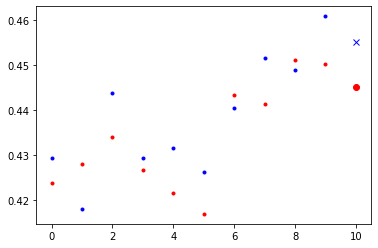

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

위 그래프에서 점들이 인풋으로 들어갈 값, 빨간 큰 점, X가 예측할 값 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 69,953
Trainable params: 69,953
Non-trainable params: 0
_________________________________________________________________


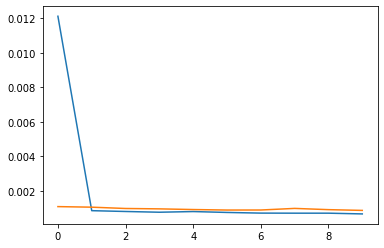

17/17 [==============================] - 0s 5ms/step - loss: 6.2964e-04 - mape: 131465.9219
loss= 0.000629640999250114
mape= 131465.921875


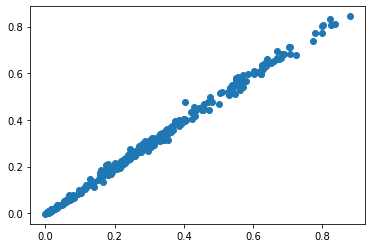

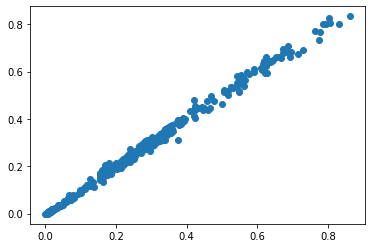

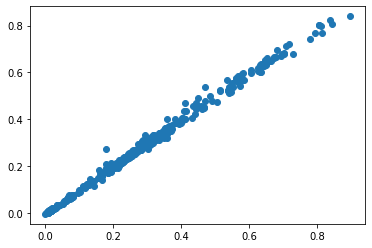

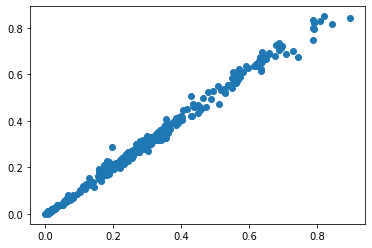

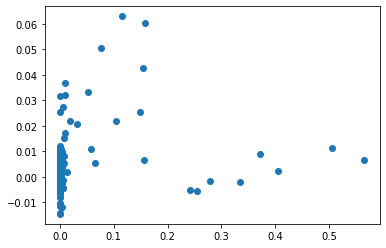

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation = 'relu')) #보통 flatten 다음에 hidden 한개 정도 넣어 줌 
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

- 볼륨을 제외한 나머지는 가격을 잘 맞춤 
- 볼륨 때문에 mape가 높게 나옴 

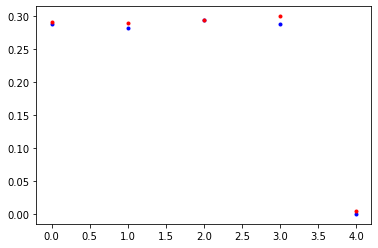

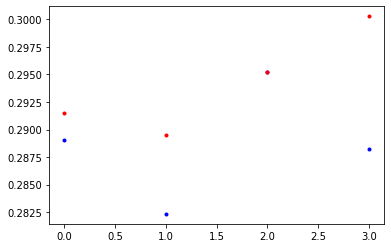

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
# 정규화 역 연산 
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

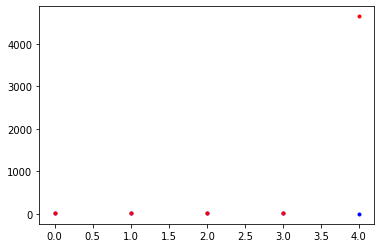

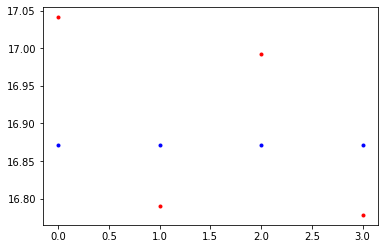

In [ ]:
plt.plot(denomalized_test_y[0], 'b.')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'b.')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

# by Keras Sequence Data Generator

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes), self.numbers.shape[-1]))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [ ]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 10, 5)
(32, 5)
[[2.41121669e-01 2.37701675e-01 2.46219602e-01 2.41348355e-01
  7.04651286e-05]
 [2.41234195e-01 2.43966237e-01 2.46334507e-01 2.49091072e-01
  1.10982577e-03]
 [2.48435888e-01 2.43856333e-01 2.52884123e-01 2.48664662e-01
  1.23313975e-04]
 [2.38308508e-01 2.32865872e-01 2.41577418e-01 2.35917231e-01
  2.17267480e-04]
 [2.38646087e-01 2.33305491e-01 2.42289832e-01 2.36612954e-01
  1.11569787e-04]
 [2.36012968e-01 2.30513914e-01 2.40244513e-01 2.35356165e-01
  5.87209405e-05]
 [2.36057979e-01 2.30557876e-01 2.39899797e-01 2.35199066e-01
  8.80814107e-05]
 [2.33694924e-01 2.46867719e-01 2.38635836e-01 2.52053503e-01
  1.76162821e-05]
 [2.50123785e-01 2.56649228e-01 2.55412045e-01 2.62040487e-01
  4.69767524e-05]
 [2.60251165e-01 2.62869829e-01 2.65753544e-01 2.68257103e-01
  2.17267480e-04]]
[2.66102540e-01 2.65133842e-01 2.71728633e-01 2.70703330e-01
 5.87209405e-05]
5171
4136
517
518


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 128)               68608     
                                                                 
 flatten_18 (Flatten)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


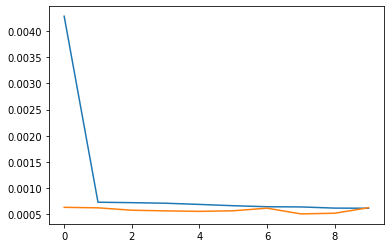

16/16 [==============================] - 0s 5ms/step - loss: 9.9455e-04 - mape: 353718.3750
loss= 0.0009945514611899853
mape= 353718.375


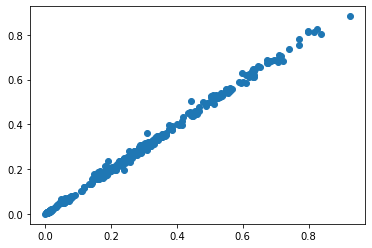

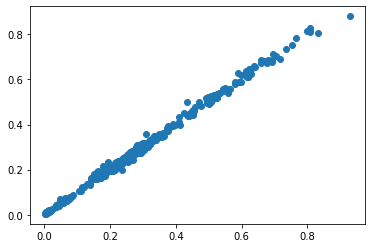

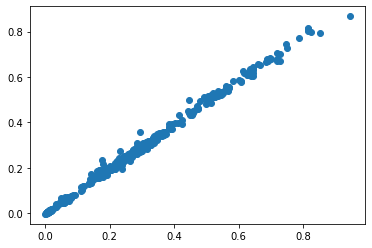

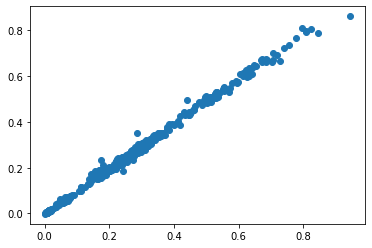

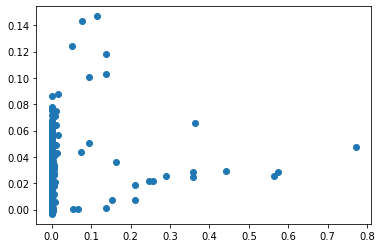

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
output_shape = preprocessed.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=0, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
for i in range(output_shape):
    plt.scatter(batch_y[:,i], y_[:,i])
    plt.show()